## PCA - Principal Component Analysis

İris datasetinde 3 tane İris çiceği çeşidi vardır.
Her bir çicek için 4 özellik tanımlanmıştır:

- taç yaprak uzunluğu(sepal length)
- taç yaprak genişliği(sepal widht)
- çanak yaprak genişliği(petal widht)
- çanak yaprak uzunluğu(petal lenght)

Bitki tür ismi bağımlı(dependent) değişken, bitkilerin ölçülen 4 temel özelliği ise bağımsız(independent) değişkendir

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "pca_iris.data"

df = pd.read_csv(url, names=['sepal length','sepal widht','petal length','petal widht','type'])
df

,sepal length,sepal widht,petal length,petal widht,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
features = ['sepal length','sepal widht','petal length','petal widht']
# feature'ları x olarak ayıralım 
x = df[features]

# target'ları y olarak alalım
y = df['type']

#### Değerleri Scale etmemiz gerekiyor. Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor. Bu amaçla standart scaler kullanarak tüm verileri mean=0 and variance=1 olacak şekilde değiştiriyoruz

In [8]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### PCA Projection 4 boyuttan - 2 boyuta

In [10]:
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponent, columns=['principal components 1', 'principal components 2'])

principalDf

,principal components 1,principal components 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


### Type sütunumuzu da PCA dataframe'imizin sonun ekleyelim

In [13]:
final_dataframe = pd.concat([principalDf,df[['type']]],axis=1)

In [14]:
final_dataframe.head()

,principal components 1,principal components 2,type
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Görselleştirme

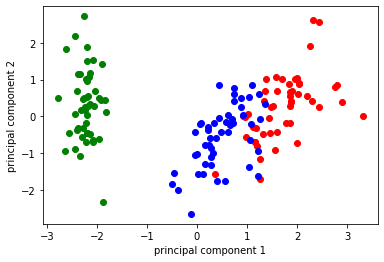

In [19]:
targets = ['Iris-setosa','Iris-virginica','Iris-versicolor']
color = ['green', 'red', 'blue']

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

for target,col in zip(targets,color):
    dftemp = final_dataframe[df.type==target]
    plt.scatter(dftemp['principal components 1'], dftemp['principal components 2'], color=col)
    

### Veri Setimizi Ne kadar Koruduk ?

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [21]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

In [ ]:
# %95 korumuşuz